# Pregunta 2

a) La razón por la cual uno en la práctica no quiere el optimo global de la función de perdida es porque justamente esto apunta a overfitting y como ya sabemos, esto no es lo ideal. 

b) Notemos que la función sigmoide es: $ f(x) = \frac{1}{1+e^{-x}} $. De este modo, si definimos $ h(x) = 1 $ y $ g(x) = 1+e^{-x} $, entonces tenemos que:

$ f(x) = \frac{h(x)}{g(x)} \ \Rightarrow \ f'(x) = \frac{h'(x) g(x) - h(x) g'(x)}{[g(x)]^2} = \frac{(-1) \cdot (-1) \cdot e^{-x}}{(1+e^{-x})^2} = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \frac{1}{1+e^{-x}} \cdot \left( 1-\frac{1}{1+e^{-x}} \right) = f(x) \cdot (1-f(x)) $

A partir de esto tenemos que el grafico de la derivada de la función sigmoide es:

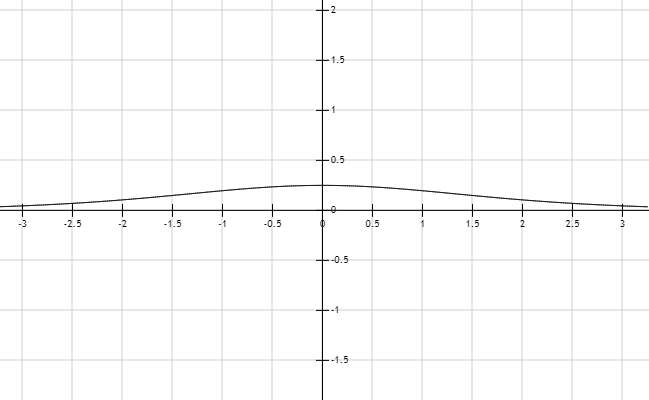

Como se observa el máximo valor de la derivada es 0.25 lo cual es un valor muy pequeño. Así tenemos que los valores de la derivada siempre son pequeños. Este fenomeno se conoce como "vanishing gradient" y el problema que este fenomeno puede generar para la optimización por medio del descenso de gradiente es que el algoritmo se quede estancado, pues como el gradiente es pequeño, el cambio entre una iteración y otra para el valor de "x" es muy pequeño y por ende el cambio en el valor de la función objetivo también es pequeño.

Además de todo lo ya mencionado, notemos que si tenemos un perceptron multicapa, entonces se tendrán que ir multiplicando derivadas y se va a observar que como la función de activación tiene una derivada menor que 1, entonces al multiplicarse 2 veces nos da un valor aún más pequeño $ (\frac{1}{4})^2 $, es decir, hay aún más probabilidades que antes de que el algoritmo anterior. Y si extrapolamos este fenomenos a un perceptron de $n$ multicapas, entonces a medida que $n$ vaya creciendo, esto será cada vez peor.

$c)$ Primero que todo notemos que la funciones $f(x)$ de activación que usaremos serán:

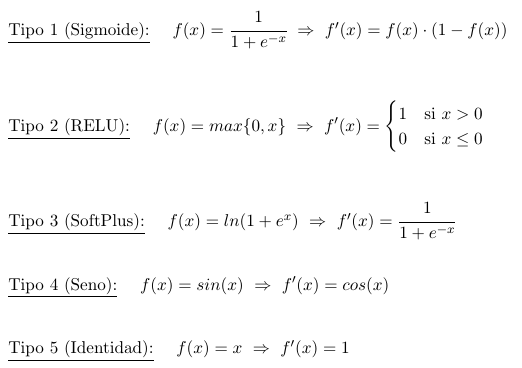


Por otro lado, notemos que basandonos en el codigo implementado por el profesor y por los contenidos pasados en clases de backpropagation deduciremos el MLP que nos piden por enunciado.

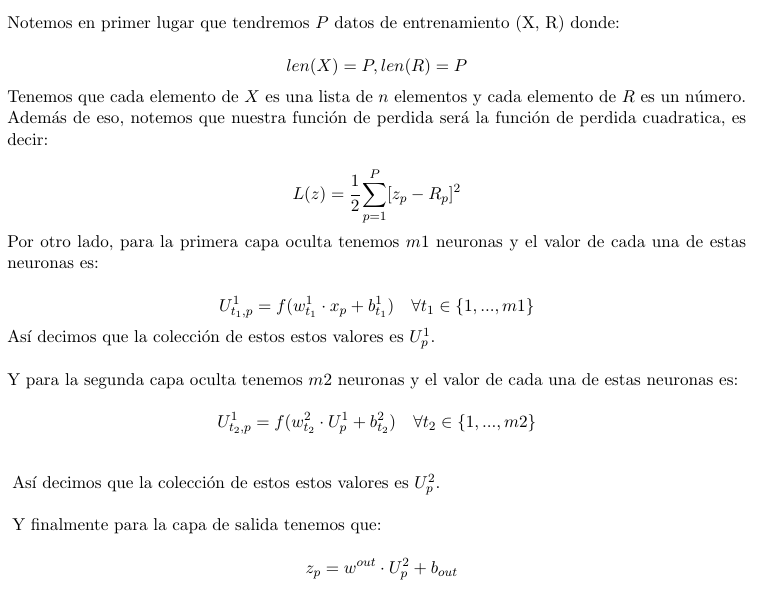

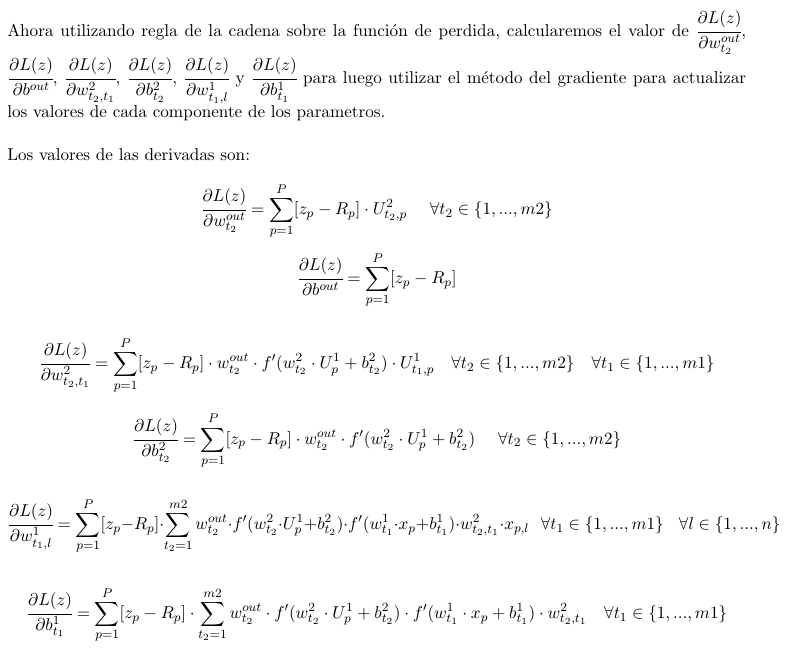

Ahora, implementaremos el MLP y mostraremos como va bajando la perdida a medida que realizamos las iteraciones y finalmente mostraremos un contraste entre las predicciones y los valores reales.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funciones de activación

# tipo = 1 -> Sigmoide
# tipo = 2 -> RELU
# tipo = 3 -> SoftPlus
# tipo = 4 -> Seno
# tipo = 5 -> Identidad

def funcion_tipo(x, tipo):
    if tipo == 1:
        valor = 1/(1+math.exp(-x))
        return valor
    elif tipo == 2:
        valor = max(0, x)
        return valor
    elif tipo == 3:
        valor = math.log(1+math.exp(x))
        return valor
    elif tipo == 4:
        valor = np.sin(x)
        return valor
    elif tipo == 5:
        return x

def derivada_tipo(x, tipo):
    if tipo == 1:
        valor = 1/(1+math.exp(-x))
        derivada = valor*(1-valor)
        return derivada
    elif tipo == 2:
        if x > 0:
            return 1
        else:
            return 0
    elif tipo == 3:
        M = 100
        if -M<= x <= M:
            valor = 1/(1+math.exp(-x))
            return valor
        elif x < -M:
            return 0
        elif x > M:
            return 1
    elif tipo == 4:
        valor = np.cos(x)
        return valor
    elif tipo == 5:
        valor = 1
        return valor

In [3]:
def producto_punto(lista_1, lista_2):
    contador = 0
    for i in range(len(lista_1)):
        contador = contador + lista_1[i]*lista_2[i]
    return contador

In [4]:
def una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso):

    U_1_total = []

    for p in range(P):

        U_1_parcial = []

        for i in range(m1):

            U_1_parcial.append(funcion_tipo(producto_punto(w_1[i], X[p]) + b_1[i], tipo))

        U_1_total.append(U_1_parcial)

    #----------------------------

    U_2_total = []

    for p in range(P):

        U_2_parcial = []

        for i in range(m2):

            U_2_parcial.append(funcion_tipo(producto_punto(w_2[i], U_1_total[p]) + b_2[i], tipo))

        U_2_total.append(U_2_parcial)

    #----------------------------

    Z_total = []

    for p in range(P):

        Z_total.append(producto_punto(w_out, U_2_total[p]) + b_out)

    #----------------------------

    # ACTUALIZACION DE PARAMETROS

    # Actualizar w_out

    w_out_nuevo = []

    for t2 in range(m2):

        contador = 0

        for p in range(P):

            contador = contador + (Z_total[p] - R[p])*U_2_total[p][t2]

        w_out_nuevo.append(w_out[t2] - paso*contador)

    #----------------------------

    b_out_nuevo = 0

    contador = 0

    for p in range(P):
        contador = contador + (Z_total[p] - R[p])

    b_out_nuevo = b_out - paso*contador

    #----------------------------

    w_2_nuevo = []

    for t2 in range(m2):
        nuevo_elemento_w_2 = []

        for t1 in range(m1):

            contador = 0

            for p in range(P):

                derivada = derivada_tipo(producto_punto(w_2[t2], U_1_total[p]) + b_2[t2], tipo)
                sumar = (Z_total[p] - R[p])*w_out[t2]*U_1_total[p][t1]*derivada

                contador = contador + sumar

            nuevo_elemento_w_2.append(w_2[t2][t1] - paso*contador)

        w_2_nuevo.append(nuevo_elemento_w_2)

    #----------------------------

    b_2_nuevo = []

    for t2 in range(m2):

        contador = 0

        for p in range(P):

            derivada = derivada_tipo(producto_punto(w_2[t2], U_1_total[p]) + b_2[t2], tipo)

            sumar = (Z_total[p] - R[p])*w_out[t2]*derivada

            contador = contador + sumar

        b_2_nuevo.append(b_2[t2] - paso*contador)

    #----------------------------

    w_1_nuevo = []

    for t1 in range(m1):

        w_1_nuevo_parcial = []

        for l in range(n):

            contador = 0

            for p in range(P):

                subcontador = 0

                for t2 in range(m2):

                    derivada_2 = derivada_tipo(producto_punto(w_2[t2], U_1_total[p]) + b_2[t2], tipo)
                    derivada_1 = derivada_tipo(producto_punto(w_1[t1], X[p]) + b_1[t1], tipo)

                    sumar_sub = derivada_1*derivada_2*w_out[t2]*X[p][l]*w_2[t2][t1]

                    subcontador = subcontador + sumar_sub

                contador = contador + (Z_total[p] - R[p])*subcontador

            w_1_nuevo_parcial.append(w_1[t1][l] - paso*contador)

        w_1_nuevo.append(w_1_nuevo_parcial)

    #----------------------------

    b_1_nuevo = []

    for t1 in range(m1):

        contador = 0

        for p in range(P):

            subcontador = 0

            for t2 in range(m2):

                derivada_2 = derivada_tipo(producto_punto(w_2[t2], U_1_total[p]) + b_2[t2], tipo)
                derivada_1 = derivada_tipo(producto_punto(w_1[t1], X[p]) + b_1[t1], tipo)

                sumar_sub = derivada_1*derivada_2*w_out[t2]*w_2[t2][t1]

                subcontador = subcontador + sumar_sub

            contador = contador + (Z_total[p] - R[p])*subcontador

        b_1_nuevo.append(b_1[t1] - paso*contador)

    #----------------------------

    error = 0

    for p in range(P):
        error = error + ((Z_total[p] - R[p])**2)/2

    #----------------------------
    
    resultado = [w_out_nuevo, b_out_nuevo, w_2_nuevo, b_2_nuevo, w_1_nuevo, b_1_nuevo, error, Z_total]
    
    return resultado

In [5]:
def MLP(m1, m2, n, P, X, R, tipo, paso, T):
    
    # Inicializacion de los datos
    
    # Creacion de w_1

    w_1 = []

    for i in range(m1):
        elemento_w_1 = []
        for j in range(n):
            elemento_w_1.append(10**(-2))
        w_1.append(elemento_w_1)

    # Creacion de b_1

    b_1 = []

    for i in range(m1):
        b_1.append(10**(-2))

    # Creacion de w_2

    w_2 = []

    for i in range(m2):
        elemento_w_2 = []
        for j in range(m1):
            elemento_w_2.append(10**(-2))
        w_2.append(elemento_w_2)

    # Creacion de b_2

    b_2 = []

    for i in range(m2):
        b_2.append(10**(-2))

    # Creacion de w_out

    w_out = []

    for i in range(m2):
        w_out.append(10**(-2))

    # Creacion de b_out 

    b_out = 10**(-2)
    
    #--------------------------
    
    lista_errores = []
    
    #--------------------------
    
    eje_t = []
    
    for t in range(T):
        
        resultado = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)
        
        w_1 = resultado[4]
        b_1 = resultado[5]
        w_2 = resultado[2]
        b_2 = resultado[3]
        w_out = resultado[0]
        b_out = resultado[1]
        
        lista_errores.append(resultado[6])
        
        eje_t.append(t)
    
    return [eje_t, lista_errores, w_1, b_1, w_2, b_2, w_out, b_out]

Primero que todo, cabe aclarar que para todos los casos que entrenaremos los haremos con datos de una función que va desde R (podría ser R^n, pero lo hicimos así porque es más grafico) hasta R. La cantidad de neuronas ocultas para cada capa sera de 4. 

Ahora para el primer caso tomaremos la función g(t) = 5t + 1 e iremos comentando los resultados para las 5 distintas funciones de activación. 

In [6]:
# Seteamos los datos de entrenamiento

P = 5

X = []
R = []

for p in range(P):
    elemento_x = [p]
    elemento_r = 5*elemento_x[0] + 1
    X.append(elemento_x)
    R.append(elemento_r)

In [7]:
# Funcion de activación tipo 1: Sigmoide

In [8]:
# Ejecutamos

n = len(X[0])
tipo = 1
paso = 7*10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

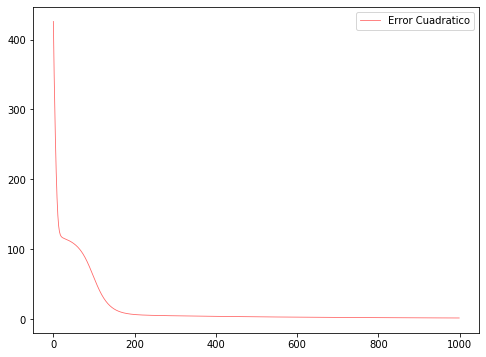

In [9]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0. 

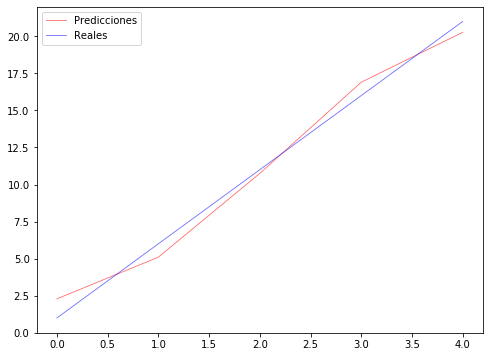

In [10]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [11]:
# Funcion de activación tipo 2: RELU

In [12]:
# Ejecutamos

n = len(X[0])
tipo = 2
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

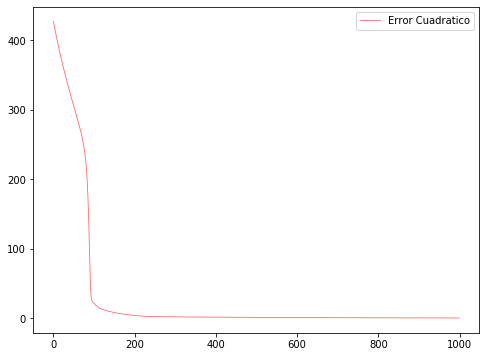

In [13]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

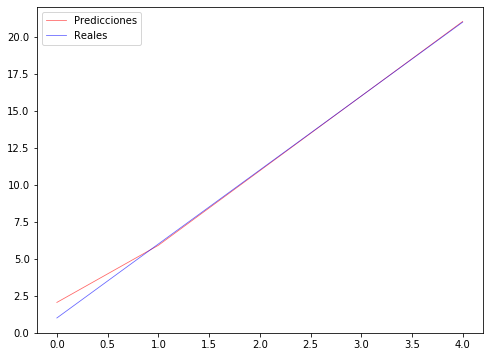

In [14]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [15]:
# Funcion de activación tipo 3: SOFTPLUS

In [16]:
# Ejecutamos

n = len(X[0])
tipo = 3
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

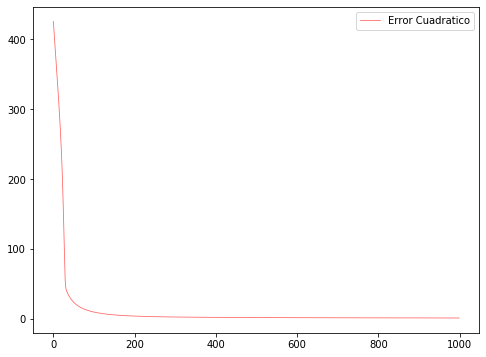

In [17]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

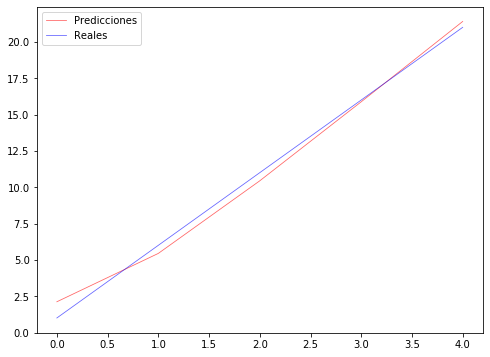

In [18]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [19]:
# Funcion de activación tipo 4: SENO

In [20]:
# Ejecutamos

n = len(X[0])
tipo = 4
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

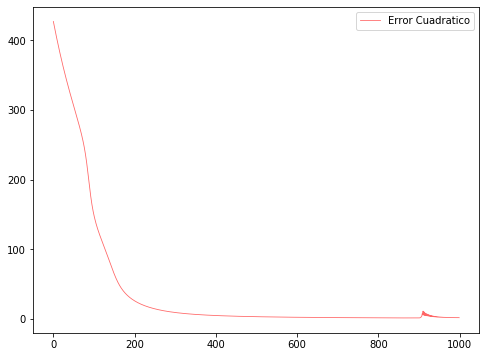

In [21]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

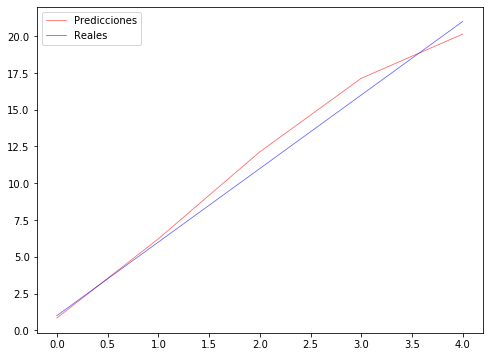

In [22]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [23]:
# Funcion de activación tipo 5: Identidad

In [24]:
# Ejecutamos

n = len(X[0])
tipo = 5
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

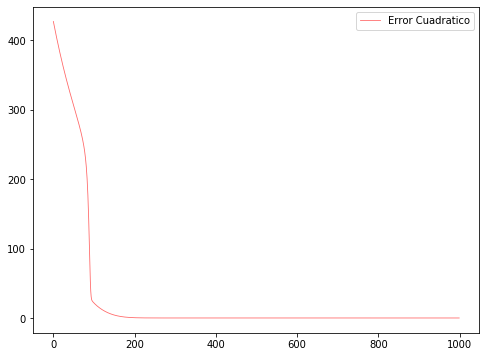

In [25]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

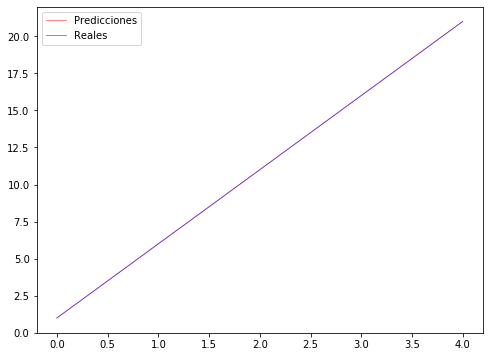

In [26]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

Ahora trabajaremos con la función $g(t) = t^2 $ y revisaremos lo que pasa con cada una de las 5 funciones de activación.

In [27]:
# Seteamos los datos de entrenamiento

P = 5

X = []
R = []

for p in range(P):
    elemento_x = [p]
    elemento_r = (elemento_x[0])**2
    X.append(elemento_x)
    R.append(elemento_r)

In [28]:
# Funcion de activación tipo 1: Sigmoide

In [29]:
# Ejecutamos

n = len(X[0])
tipo = 1
paso = 4*10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

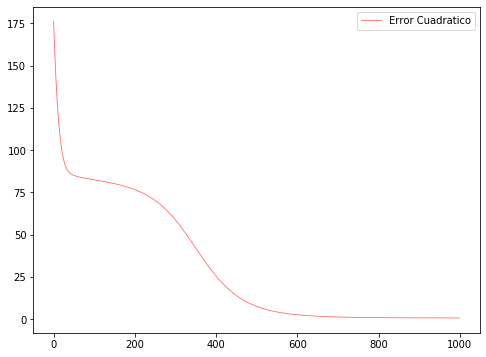

In [30]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

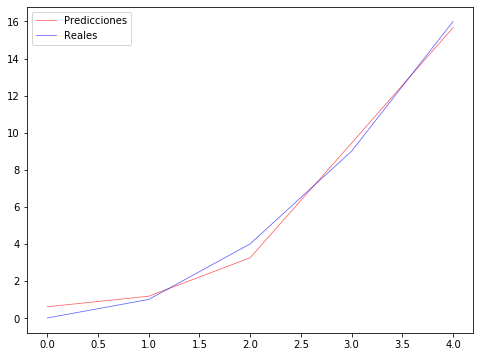

In [31]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [32]:
# Funcion de activación tipo 2: RELU

In [33]:
# Ejecutamos

n = len(X[0])
tipo = 2
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

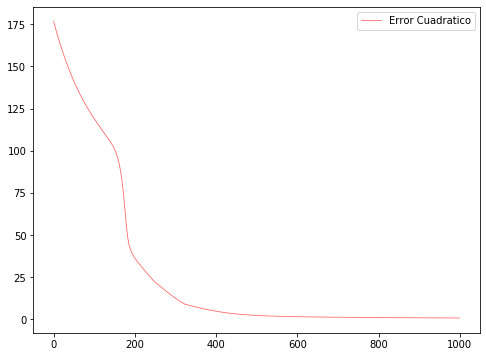

In [34]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

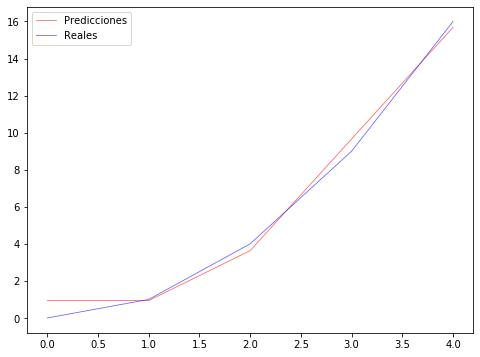

In [35]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [36]:
# Funcion de activación tipo 3: SOFTPLUS

In [37]:
# Ejecutamos

n = len(X[0])
tipo = 3
paso = 10**(-3)
T = 1000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

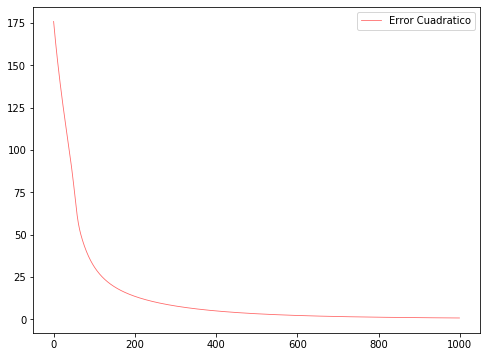

In [38]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

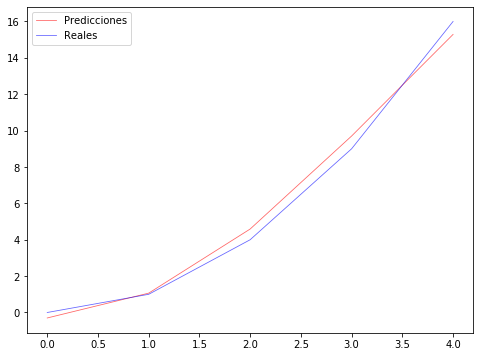

In [39]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [40]:
# Funcion de activación tipo 4: SENO

In [41]:
# Ejecutamos

n = len(X[0])
tipo = 4
paso = 10**(-3)
T = 2000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

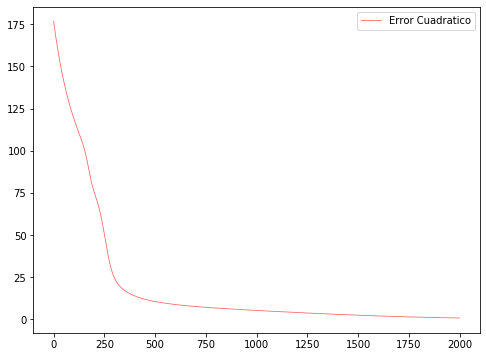

In [42]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

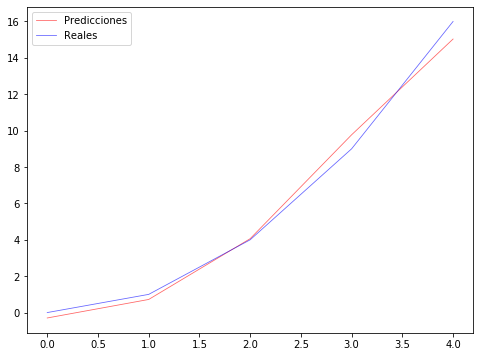

In [43]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

In [44]:
# Funcion de activación tipo 5: IDENTIDAD

In [45]:
# Ejecutamos

n = len(X[0])
tipo = 4
paso = 10**(-3)
T = 2000
m1 = 4
m2 = 4

prueba = MLP(m1, m2, n, P, X, R, tipo, paso, T)

w_1 = prueba[2]
b_1 = prueba[3]
w_2 = prueba[4]
b_2 = prueba[5]
w_out = prueba[6]
b_out = prueba[7]

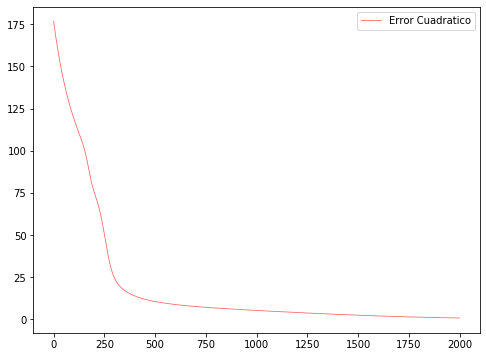

In [46]:
# Graficamos el error cuadratico

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(prueba[0], prueba[1], lw = 0.8, alpha = 0.6, color = "red")
grafico_1.set_label("Error Cuadratico")
ax.legend()

Como se observa, claramente los errores van decayendo hasta llegar a valores cercanos a 0.

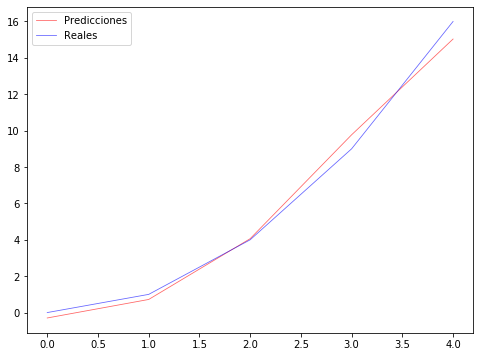

In [47]:
# ENTRENAMIENTO
# Graficamos la prediccion en conjunto con los reales

prediccion = una_iteracion(m1, m2, n, P, X, R, w_1, b_1, w_2, b_2, w_out, b_out, tipo, paso)[7]

fig, ax = plt.subplots(figsize=(8,6))
grafico_1, = ax.plot(X, prediccion, lw = 0.8, alpha = 0.6, color = "red")
grafico_2, = ax.plot(X, R, lw = 0.8, alpha = 0.6, color = "blue")

grafico_1.set_label("Predicciones")
grafico_2.set_label("Reales")
ax.legend()

Como se observa la aproximación dada es muy parecida al valor real.

$ RESUMEN \ \ DE \ \ GRAFICOS $

Ahora pasaremos a mostrar el resumen de las aproximaciones para cada caso donde también se mostraron los valores reales.

$ g(t) = 5t + 1 $

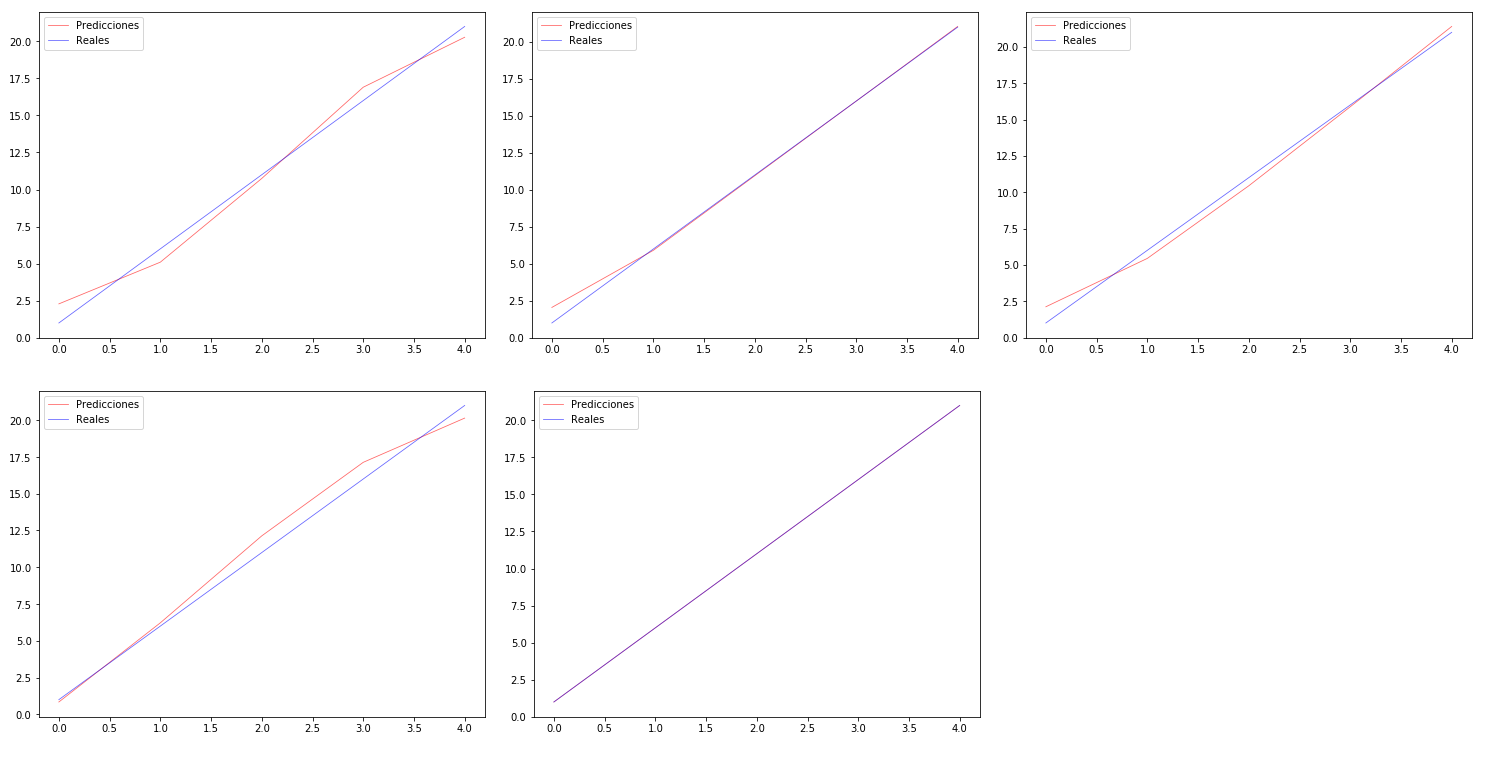

$ g(t) = t^2 $

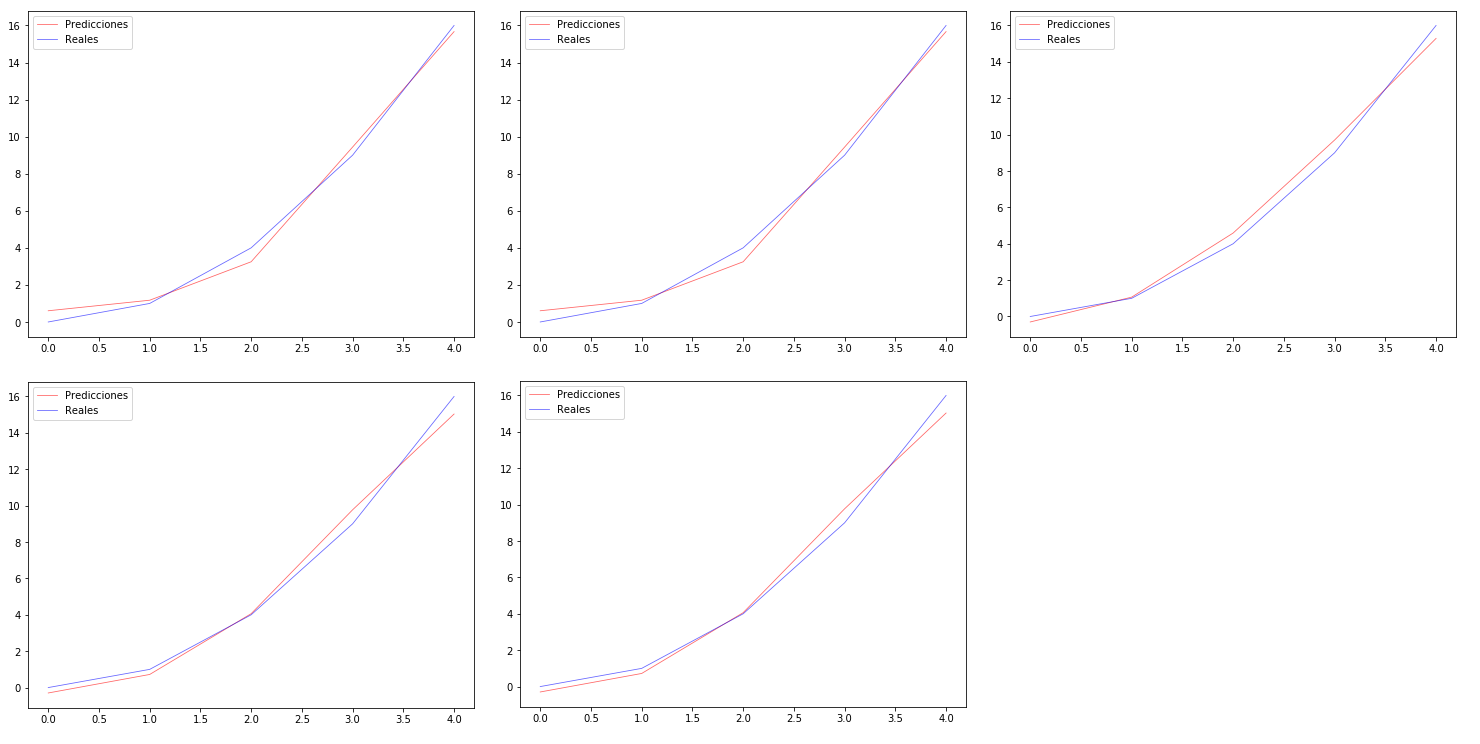